In [258]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
from numpy.random import permutation
import math

In [259]:
col_names = ['Age','Gender','Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS','1','Amphet','3','4','5','6','7','Coke','9','10','Heroin','12','13','LSD','Meth','16','17','18','19']

In [260]:
data = pd.read_csv("drug_consumption.csv", names = col_names)

In [261]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,...,10,Heroin,12,13,LSD,Meth,16,17,18,19
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [262]:
data['Age'] = round(data['Age'],3)
data['Gender'] = round(data['Gender'],3)
data['Education']= round(data['Education'],3)
data['Country'] = round(data['Country'],3)
data['Ethnicity'] = round(data['Ethnicity'],3)

In [263]:
data['Age'] = data['Age'].map({-0.952:"1", -0.079:"2", 0.498:"3", 1.094:"4", 1.822:"5", 2.592:"6"})

In [264]:
data['Gender'] = data['Gender'].map({0.482:'Female', -0.482:'Male'})

In [265]:
data['Education'] = data['Education'].map({-2.436:'1', -1.738: '2',-1.437:'3', -1.228:'4', -0.611: '5', -0.059:'6',0.455: '7', 1.164: '8', 1.984:'9'}) 

In [266]:
data['Country'] = data['Country'].map({-0.098: '1', 0.249:'2', -0.468:'3', -0.285:'4', 0.211:'5',0.961:'6', -0.570:'7'})

In [267]:
data['Ethnicity'] = data['Ethnicity'].map({-0.502:'1', 
-1.107:'2', 
1.907: '3', 
0.126: '4', 
-0.222: '5', 
0.114: '6',  
-0.317: '7'})

In [268]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,...,10,Heroin,12,13,LSD,Meth,16,17,18,19
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [269]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,19,22,25,26]]

In [270]:
amended_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL0,CL0,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2,CL3,CL0,CL2,CL3
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL0,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0,CL2,CL0,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1,CL0,CL0,CL0,CL0


In [271]:
amended_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,16,18,19,22,25,26]]

In [272]:
amended_data.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Csore,Impulsive,SS,Amphet,5,7,Coke,Heroin,LSD,Meth
0,3,Female,6,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2,CL6,CL5,CL0,CL0,CL0,CL0
1,2,Male,9,6,7,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL2,CL6,CL6,CL3,CL0,CL2,CL3
2,3,Male,6,6,7,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0,CL6,CL4,CL0,CL0,CL0,CL0
3,1,Female,8,6,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0,CL5,CL4,CL2,CL0,CL0,CL0
4,3,Female,9,6,7,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL1,CL6,CL6,CL0,CL0,CL0,CL0


In [273]:
amended_data = amended_data.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,1,2,2,3,3])

#Hot Encoding for Categorical Data

In [274]:
# limit to categorical data using df.select_dtypes()
X = amended_data[['Age', 'Gender', 'Education', 'Country','Ethnicity']]

# check original shape
print(X.shape)

# view columns using df.columns
print(X.columns)


# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X)

# 3. Transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape


X = pd.DataFrame(onehotlabels)
X.columns= ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White']

(1885, 5)
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], dtype='object')


In [275]:
Y = amended_data.loc[:,['Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS','Amphet','Coke','Heroin','LSD','Meth']]
encoded_data = pd.concat([X,Y], axis = 1, sort = False)

In [276]:
encoded_data.head()

,Age1,Age2,Age3,Age4,Age5,Age6,Female,Male,Ed1,Ed2,...,Oscore,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,2,0,1,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0


In [277]:
encoded_data['Drug_indicator'] = encoded_data[['Amphet', 'Coke', 'Heroin', 'LSD', 'Meth']].max(axis = 1)

#PCA Visualization for LSD

In [278]:
from sklearn.decomposition import PCA

In [279]:
features = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']

In [280]:
#Separating out the features
x = encoded_data.loc[:,features].values

In [281]:
#Separating out the target
y = encoded_data.loc[:,['Drug_indicator']].values

In [282]:
pca = PCA(n_components = 2)

In [283]:
principalComponents = pca.fit_transform(x)

In [284]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [285]:
finalDf = pd.concat([principalDf, multi_class_data[['LSD']]], axis = 1)

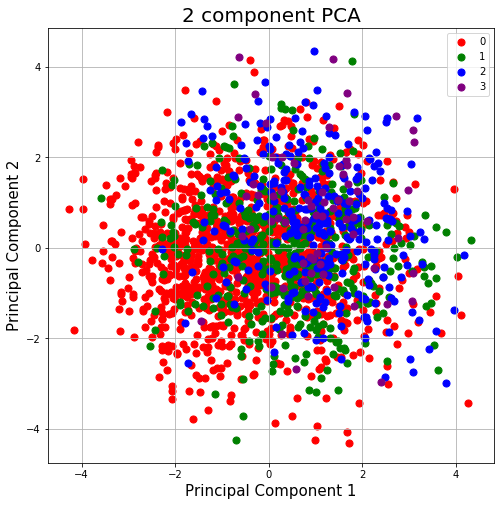

In [286]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0','1','2', '3']
colors = ['r', 'g', 'b', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LSD'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Hence, we conclude that there isn't much difference between people who have used drug over varying periods of time however, there is a noticeable difference in the people who have never used drug and the people who have used drug at some point in their life.

#KNN
Multi class - comparison between 5 and 50 neighbors.

In [287]:
# Randomly shuffle the index.
random_indices = permutation(encoded_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(encoded_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = encoded_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = encoded_data.loc[random_indices[test_cutoff:]]

In [288]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5 and predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 1.5 and predictions[i]<2.5:
        predictions[i] = 2
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.4226475279106858


In [289]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['LSD']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the fifty closest neighbors.
knn = KNeighborsRegressor(n_neighbors=50)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5 and predictions[i] < 1.5:
        predictions[i] = 1
    elif predictions[i] > 1.5 and predictions[i]<2.5:
        predictions[i] = 2
    elif predictions[i] > 2.5:
        predictions[i] = 3
    else: predictions[i] =0
        

# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.5518341307814992


Hence, in multi class knn, there is no significant diffference in the accuracy when the closest neighbors are set to 5 or 50

#Convert to binary classification

In [290]:
binary_data = encoded_data

In [291]:
binary_data.head()

,Age1,Age2,Age3,Age4,Age5,Age6,Female,Male,Ed1,Ed2,...,Ascore,Csore,Impulsive,SS,Amphet,Coke,Heroin,LSD,Meth,Drug_indicator
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.76096,-0.14277,-0.71126,-0.21575,1,2,0,1,2,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.59042,0.58489,-1.37983,-1.18084,0,1,0,0,0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,1


In [292]:
binary_data['Drug_indicator'] = binary_data['Drug_indicator'].map({0:0, 1:1, 2:1, 3:1})


In [293]:
# Randomly shuffle the index.
random_indices = permutation(binary_data.index)

# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(binary_data)/3)

# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = binary_data.loc[random_indices[1:test_cutoff]]

# Generate the train set with the rest of the data.
train = binary_data.loc[random_indices[test_cutoff:]]

In [294]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.7400318979266348


In [295]:
# The columns that we will be making predictions with.
x_columns = ['Age1','Age2','Age3','Age4','Age5','Age6','Female', 'Male','Ed1', 'Ed2','Ed3','Ed4','Ed5','Ed6','Ed7','Ed8','Ed9','Aus','Canada','NZ','Other','Ireland','UK','USA','Asian','Black', 'AB','WA','WB','Other','White','Nscore', 'Escore', 'Oscore', 'Ascore', 'Csore', 'Impulsive','SS']
# The column that we want to predict.
y_column = ['Drug_indicator']

from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=50)
# Fit the model on the training data.
knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else: predictions[i] =0
        
# Get the actual values for the test set.
actual = test[y_column]

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(predictions, actual))

Accuracy: 0.7559808612440191


Hence, we find a significant improvement in the KNN model when used for binary classification instead of multi class classification. The model with 50 neighbors performs slightly better than the one with 5 closest neighbors.